<a href="https://colab.research.google.com/github/KHATHARSYS/Data-Science-Projects-with-Python/blob/main/Classification_model_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification model performance analysis
Hreunder we show a dataset with information of the clients that have (or have not) bought a product. Considering two features (Age and Estimated Salary) we are going to build a classification model and assess its performance, then we will choice the best one.The models for this case are:

*   Logistic Regression 

*   K Neirest Neghbors

Let's load the packages that we will require

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import itertools
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Next the data 

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv")
dataset.shape
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training the Logistic Regression model on the Training set


In [5]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

Training the KNN model on the Training set

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

Predicting the Test set results

In [7]:
y_pred_lr = classifier_lr.predict(X_test)
y_pred_knn = classifier_knn.predict(X_test)
#print(np.concatenate((y_pred_lr.reshape(len(y_pred_lr),1), y_test.reshape(len(y_test),1)),1))

Making the Confusion Matrixes

In [8]:
class_names=np.array(['0','1'])

def plot_confusion_matrix(cm, classes,
                          title,
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

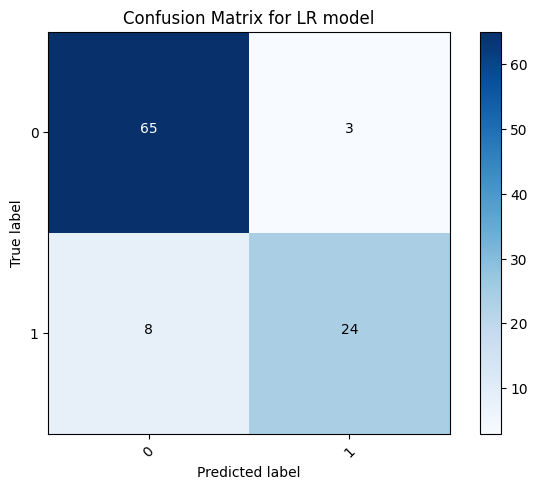

In [9]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cm_lr,class_names, title= "Confusion Matrix for LR model")

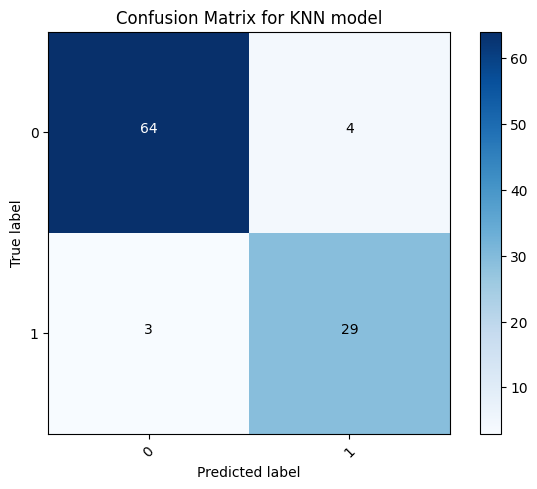

In [10]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(cm_knn,class_names, title= "Confusion Matrix for KNN model")

Accuracy Score LR model vs KNN model

In [13]:
print(accuracy_score(y_test, y_pred_lr)," vs. ",accuracy_score(y_test, y_pred_knn))

0.89  vs.  0.93


True Positive Rate LR model vs KNN model



In [16]:
from sklearn import metrics
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, y_pred_lr)
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_test, y_pred_knn)
print("TPR LR model = ", tpr_lr[1]," vs. " , "TPR KNN model = ", tpr_knn[1])

TPR LR model =  0.75  vs.  TPR KNN model =  0.90625


False Positive Rate LR model vs KNN model


In [17]:
print("FPR LR model = ", fpr_lr[1]," vs. " , "FPR KNN model = ", fpr_knn[1])

FPR LR model =  0.04411764705882353  vs.  FPR KNN model =  0.058823529411764705


##Visualising the Test set results  for LR model

<ipython-input-21-3574e885951b>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


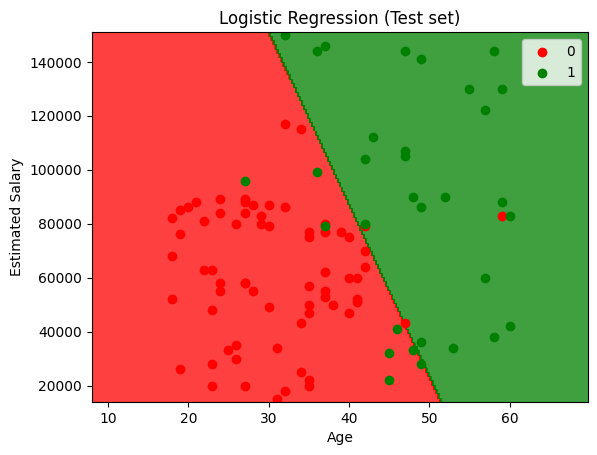

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier_lr.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

##Visualising the Test set results for KNN model

<ipython-input-22-1d06ab789014>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


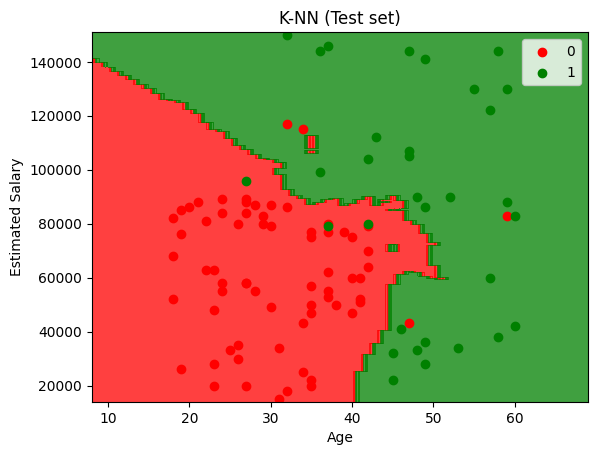

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier_knn.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

##ROC CURVE

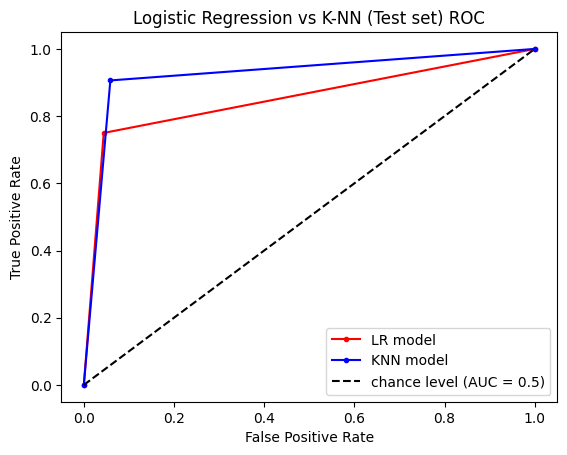

In [39]:
plt.plot(fpr_lr, tpr_lr, marker=".", color = "red", label = "LR model")
plt.plot(fpr_knn, tpr_knn, marker=".", color = "blue", label = "KNN model")
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.title('Logistic Regression vs K-NN (Test set) ROC')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')

It is easy to visualize that  the KNN model has a better performance, because the area under its curve is clearly greater. Hereunder we show the results.

In [26]:
print("Area under the ROC curve for LR model", roc_auc_score(y_test, y_pred_lr), "vs" ,"Area under the ROC curve for KNN model", roc_auc_score(y_test, y_pred_knn))

Area under the ROC curve for LR model 0.8529411764705883 vs Area under the ROC curve for KNN model 0.9237132352941176
